In [87]:
# Importando Bibliotecas
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

!pip install sweetviz --quiet ## --quiet para não ficar gigante a saida
import sweetviz as sv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Arquivo
arquivo = r'Cap 01 Asset_PBL_Perfil_Clientes_Top_ECommerce.xlsx'

# Lendo arquivo
df = pd.read_excel(arquivo)

# Análise inicial dos dados

In [88]:
df.shape

(47835, 8)

In [89]:
# Imprimindo o DF para verificar os dados
df.head(10)

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor ticket médio,numero pedido
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102,37380646
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32,35870530
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101,38158515
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70,36341482
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67,38416338
5,Sul,Rio Grande do Sul,2023-09-01,Boleto Bancário,F,22,108,38022271
6,Norte,Acre,2023-12-31,Dinheiro,F,22,49,36263144
7,Norte,Amapá,2023-11-05,Pix,M,21,56,37511576
8,Norte,Pará,2023-11-04,Cartão Crédito,F,22,105,36265605
9,Norte,Rondônia,2023-11-05,Cartão Débito,F,21,93,38213309


In [90]:
# Utilizando o método info para verificar os tipos de dados de cada coluna e identificar possíveis problemas (valores nulos, tipos incorretos, etc.).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47835 entries, 0 to 47834
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Região País             47835 non-null  object        
 1   Estado                  47835 non-null  object        
 2   Data                    47835 non-null  datetime64[ns]
 3   FormaPagto              47835 non-null  object        
 4   Sexo Informado Cliente  47835 non-null  object        
 5   Idade                   47835 non-null  int64         
 6   valor ticket médio      47835 non-null  int64         
 7   numero pedido           47835 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 2.9+ MB


Utilizando o método info para verificar os tipos de dados de cada coluna e identificar possíveis problemas (valores nulos, tipos incorretos, etc. E verificamos que não será necessário realizar nenhuma alteração nos tipos de dados

# Verificação de Dados Missing

In [91]:
# Verificando se há valores ausentes para decidir a melhorar estratégica
df.isnull().sum()

,0
Região País,0
Estado,0
Data,0
FormaPagto,0
Sexo Informado Cliente,0
Idade,0
valor ticket médio,0
numero pedido,0


Não foram encontrados dados missing em nenhuma das colunas. Isso indica que não há necessidade de tratamento específico para valores ausentes nesta etapa.

# Verificação de dados duplicados

In [92]:
# Verificando e contando as linhas duplicadas
duplicadas = df[df.duplicated()]

# Exibindo o número de duplicatas
num_duplicadas = duplicadas.shape[0]
print(f"Quantidade de linhas duplicadas: {num_duplicadas}")


Quantidade de linhas duplicadas: 0


Não foram encontrados dados duplicados. Isso indica que não há necessidade de tratamento específico para valores ausentes nesta etapa.

# Análise de Correlação dos Dados

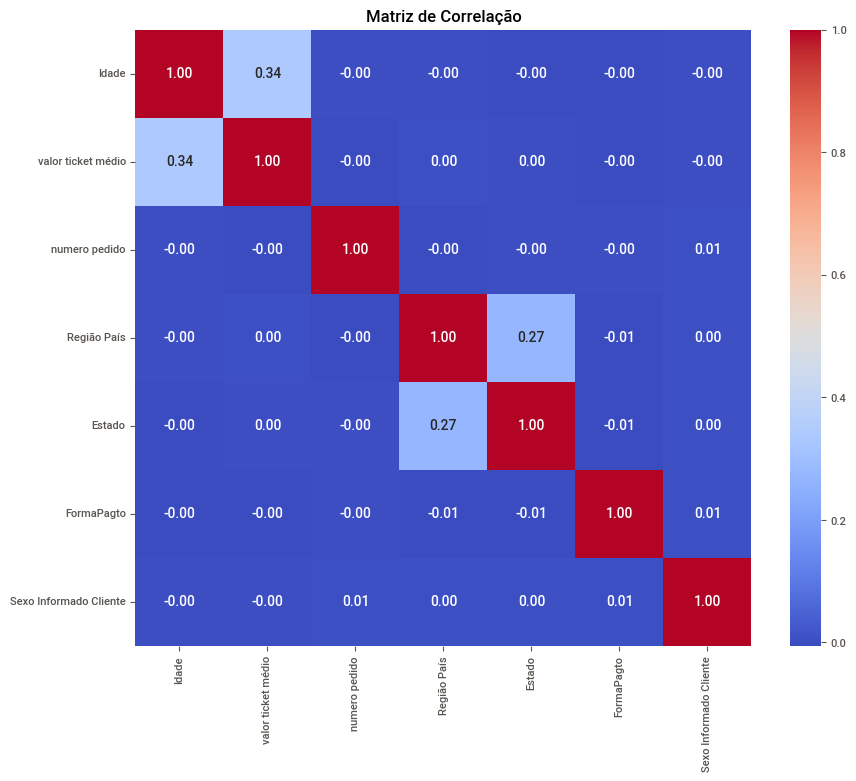

Correlações Mais Fortes:
 Idade   valor ticket médio    0.338324
Estado  Região País           0.270105
dtype: float64

Correlações Mais Fracas:
 FormaPagto  Estado        -0.005169
            Região País   -0.005517
dtype: float64


In [93]:
# Fazendo uma copa do df
df_corr = df.copy()

# Transformando variáveis categóricas em números com LabelEncoder
le = LabelEncoder()

df_corr['Região País'] = le.fit_transform(df_corr['Região País'])
df_corr['Estado'] = le.fit_transform(df_corr['Estado'])
df_corr['FormaPagto'] = le.fit_transform(df_corr['FormaPagto'])
df_corr['Sexo Informado Cliente'] = le.fit_transform(df_corr['Sexo Informado Cliente'])

# Selecionando apenas as variáveis numéricas para a correlação
df_numerico = df_corr[['Idade', 'valor ticket médio', 'numero pedido', 'Região País', 'Estado', 'FormaPagto', 'Sexo Informado Cliente']]

# Calculando a matriz de correlação usando o método Kendall
correlacao = df_numerico.corr(method='kendall')

# Estilizando a matriz de correlação para melhor visualização
correlacao_estilizada = correlacao.style.background_gradient(cmap='coolwarm')

# Exibindo a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação')
plt.show()

# Filtrando a matriz de correlação para remover correlações de 1 (diagonal)
correlacao_sem_diagonal = correlacao.mask(np.eye(correlacao.shape[0], dtype=bool))

# Encontrando as correlações mais fortes e mais fracas
correlacoes_ordenadas = correlacao_sem_diagonal.unstack().sort_values(kind="quicksort", ascending=False)

# Removendo duplicatas e valores nulos
correlacoes_ordenadas = correlacoes_ordenadas.drop_duplicates().dropna()

# Selecionando as correlações mais fortes e mais fracas
correlacoes_mais_fortes = correlacoes_ordenadas.head(2)
correlacoes_mais_fracas = correlacoes_ordenadas.tail(2)

# Exibindo as correlações mais fortes e mais fracas
print("Correlações Mais Fortes:\n", correlacoes_mais_fortes)
print("\nCorrelações Mais Fracas:\n", correlacoes_mais_fracas)


# Análise Descritiva do Conjunto de Dados

In [94]:
# Estatísticas descritivas do conjunto de dados
df.describe()

,Data,Idade,valor ticket médio,numero pedido
count,47835,47835.000000,47835.000000,4.783500e+04
mean,2023-11-22 15:59:23.875823104,39.486108,236.401129,3.692327e+07
min,2023-09-01 00:00:00,0.000000,-9876.000000,3.524540e+07
25%,2023-10-22 00:00:00,27.000000,118.000000,3.608770e+07
50%,2023-11-17 00:00:00,38.000000,183.000000,3.692539e+07
75%,2023-12-16 00:00:00,52.000000,345.000000,3.776525e+07
max,2024-05-01 00:00:00,987.000000,690.000000,3.861223e+07
std,NaN,16.612886,166.329410,9.699485e+05


Realizamos uma análise descritiva de todo o conjunto de dados, aplicando o método describe do Pandas para obter as principais estatísticas.

Na coluna "Idade", observamos uma média de aproximadamente 39 anos, com um desvio padrão de cerca de 16,6 anos, o que sugere uma distribuição razoavelmente variada de idades entre os clientes. Contudo, o valor máximo registrado é de 987 anos, o que é extremamente improvável para qualquer cliente. Esse valor representa um outlier claro e pode distorcer medidas de tendência central e dispersão, impactando a média e o desvio padrão. É recomendável tratar esse valor atípico para melhorar a precisão das análises.

Em relação à coluna "Valor do Ticket Médio", o valor mínimo de -9876.00 também é atípico e não parece adequado ao contexto de análise, uma vez que valores negativos de ticket médio são ilógicos na ausência de uma categoria específica que represente pedidos cancelados ou devoluções. Esse valor sugere erros de entrada ou processamento de dados e pode comprometer a interpretação dos resultados, especialmente em análises que envolvam a média e a dispersão dos valores de ticket.

In [95]:
# Outra forma de verificar as principais estatisticas dos dados. Exemplo de análise para a coluna "valor ticket médio", inclumos a amplitude que não temos no método describe.
print('MIN: ', df["valor ticket médio"].min())
print('MAX: ', df["valor ticket médio"].max())
print('Amplitude:' , df["valor ticket médio"].max() - df["valor ticket médio"].min())
print('Variancia: ', df["valor ticket médio"].var())
print('Desvio padrão: ', df["valor ticket médio"].std())

MIN:  -9876
MAX:  690
Amplitude: 10566
Variancia:  27665.472491095057
Desvio padrão:  166.32940957959016


In [96]:
# Outra forma de verificar as principais estatisticas dos dados. Exemplo de análise para a coluna "Idade".
print('MIN: ', df["Idade"].min())
print('MAX: ', df["Idade"].max())
print('Amplitude:' , df["Idade"].max() - df["Idade"].min())
print('Variancia: ', df["Idade"].var())
print('Desvio padrão: ', df["Idade"].std())

MIN:  0
MAX:  987
Amplitude: 987
Variancia:  275.987990113676
Desvio padrão:  16.612886266801322


Uma forma alternativa de obter as principais estatísticas do conjunto de dados é calcular cada medida separadamente. Por exemplo, para a coluna "Valor Ticket Médio", podemos calcular a amplitude, variância e desvio padrão, estatísticas que complementam as informações fornecidas pelo método describe do Pandas. O describe permite uma verificação rápida das estatísticas principais, mas, dependendo da necessidade, cálculos separados podem oferecer insights mais específicos.

* Amplitude: a diferença entre o valor máximo e o mínimo, mostra a dispersão total dos dados na coluna.
* Variância: mede a dispersão dos valores em relação à média, indicando a variabilidade dos valores do ticket médio.
* Desvio Padrão: calcula a raiz quadrada da variância e oferece uma medida de dispersão mais intuitiva, representando a média das diferenças em relação à média dos dados.

Essas estatísticas adicionais são úteis, especialmente para detectar e entender o impacto de outliers no conjunto de dados.



# Análise Exploratória Detalhada de Dados com Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


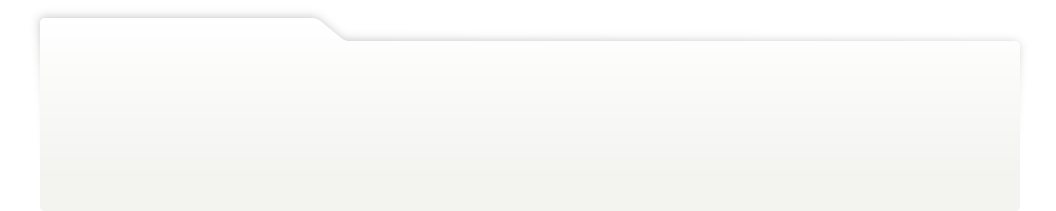
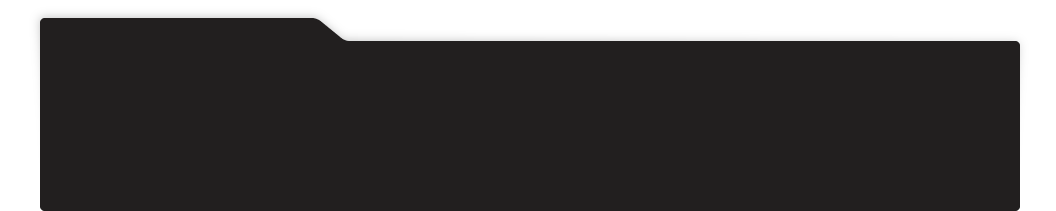
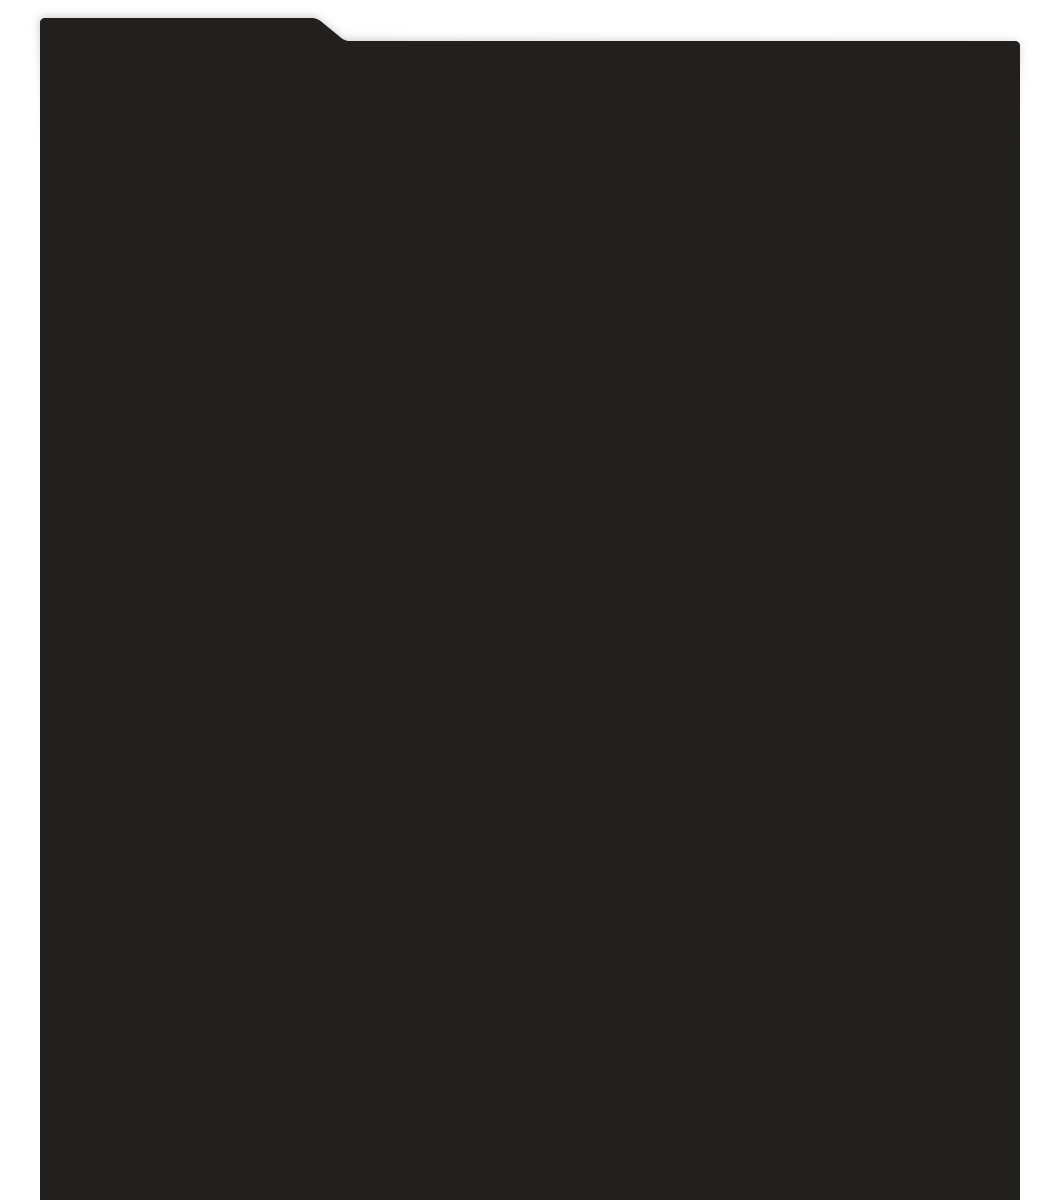
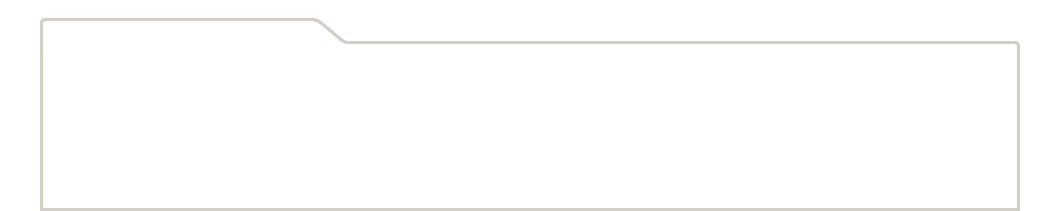
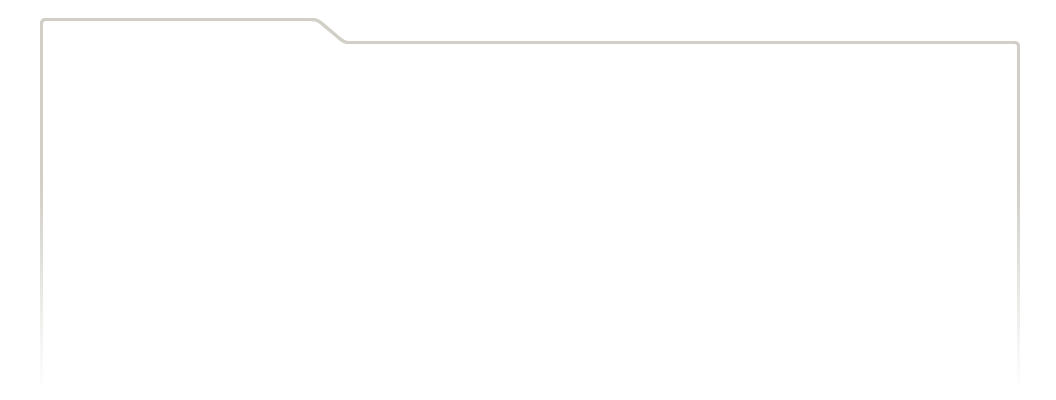
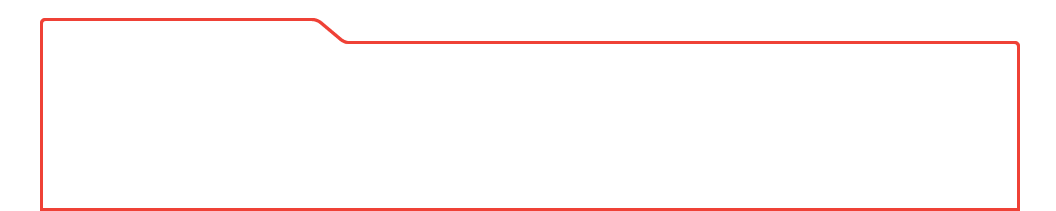
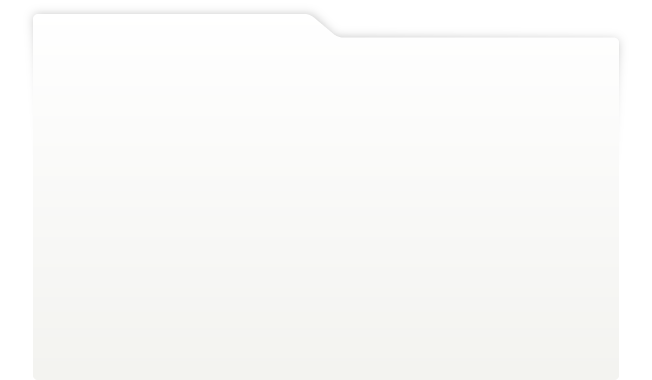
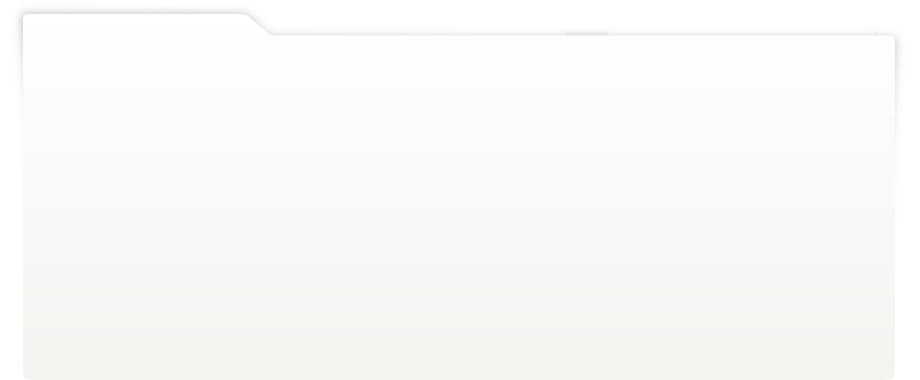
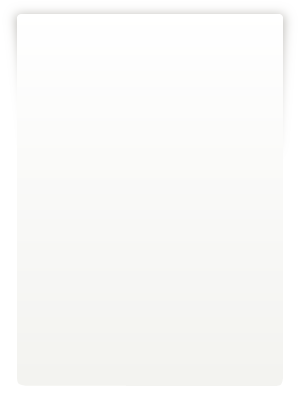
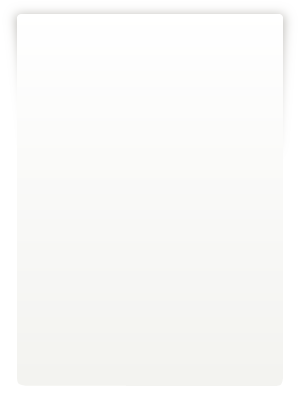
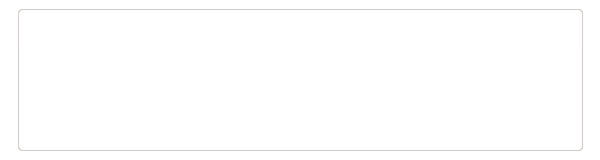
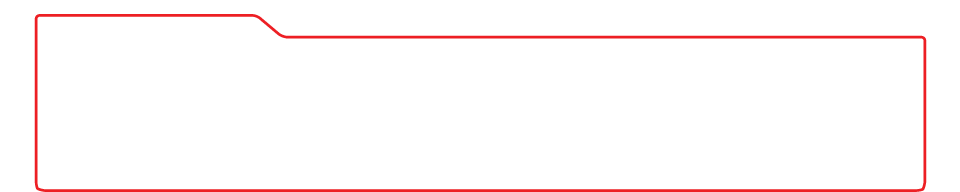
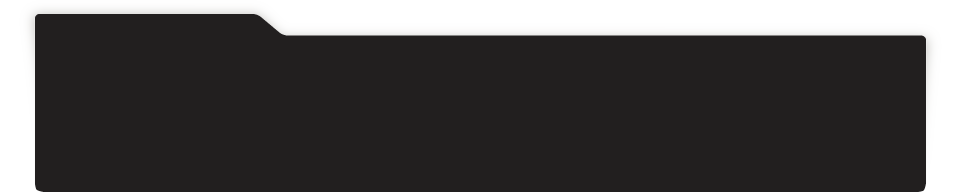
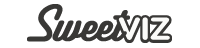
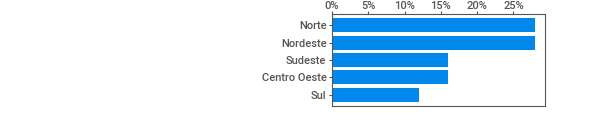
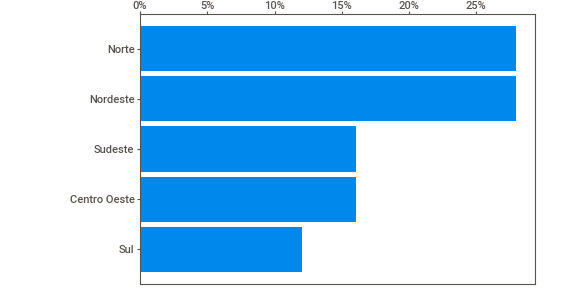
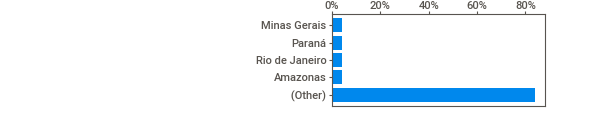
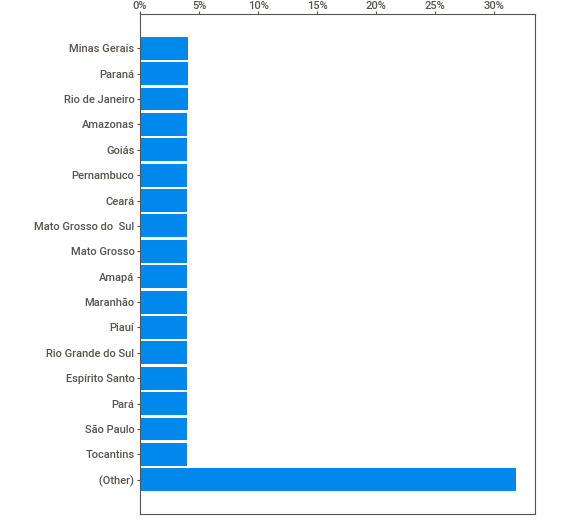
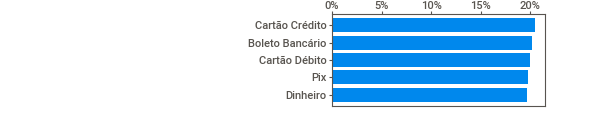
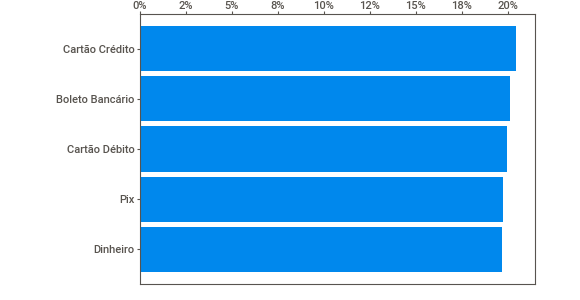
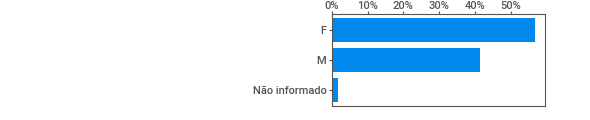
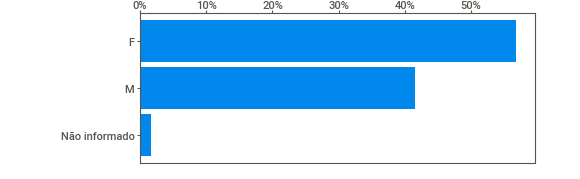
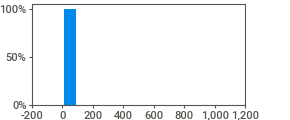
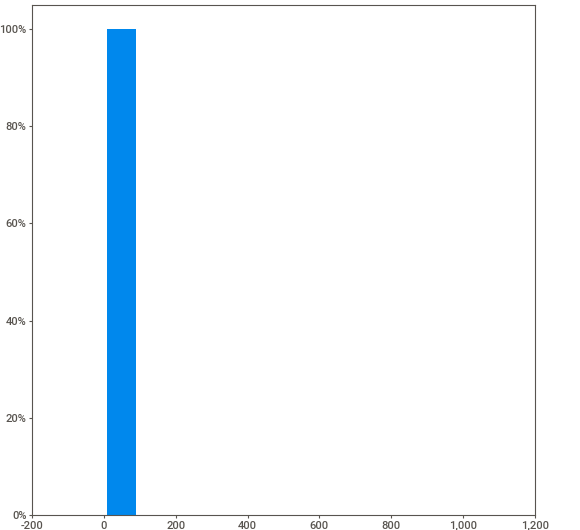
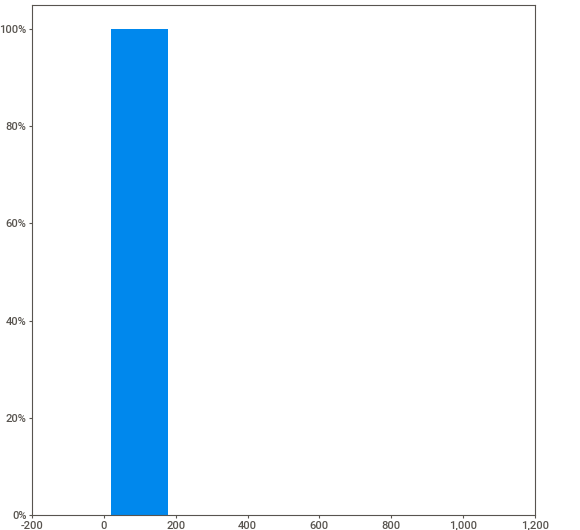
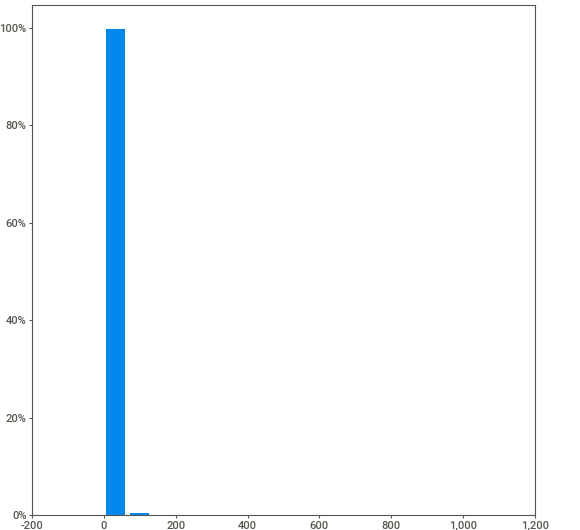
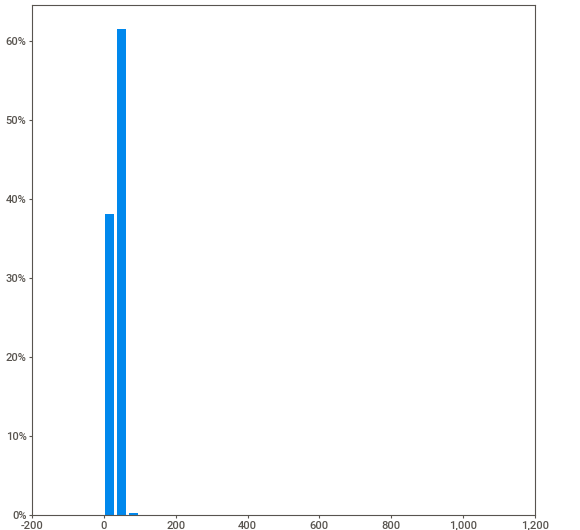
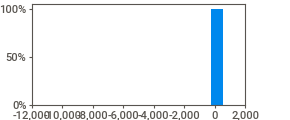
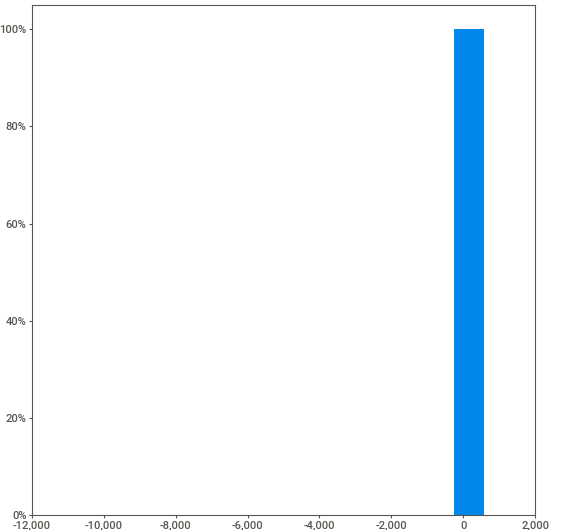
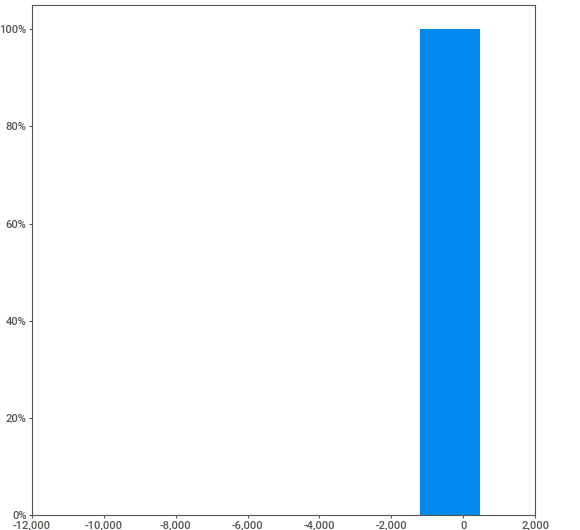
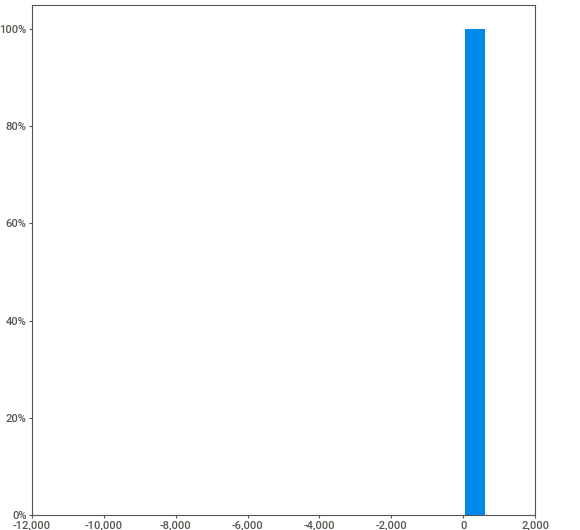
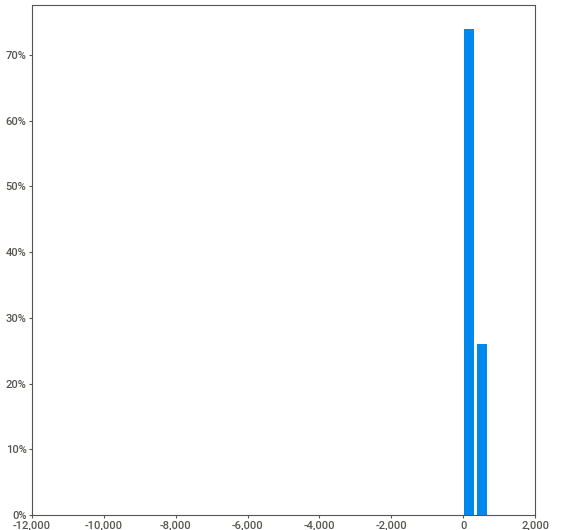
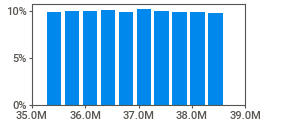
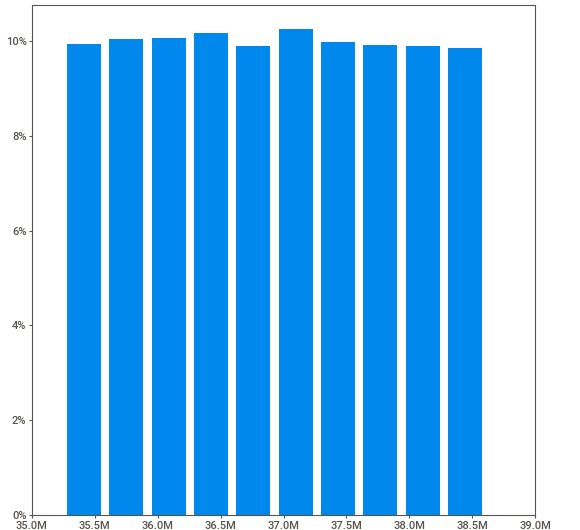
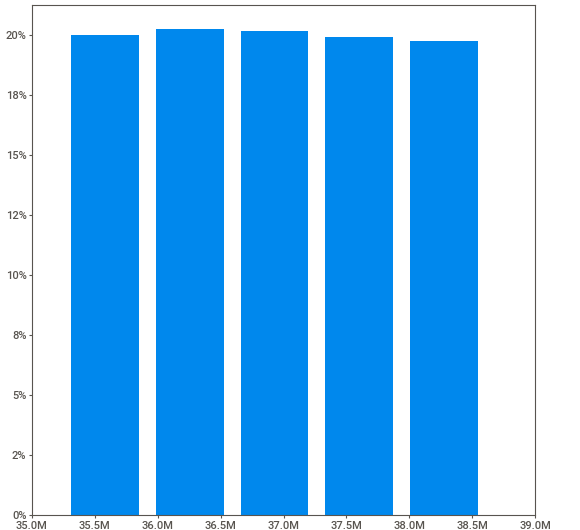
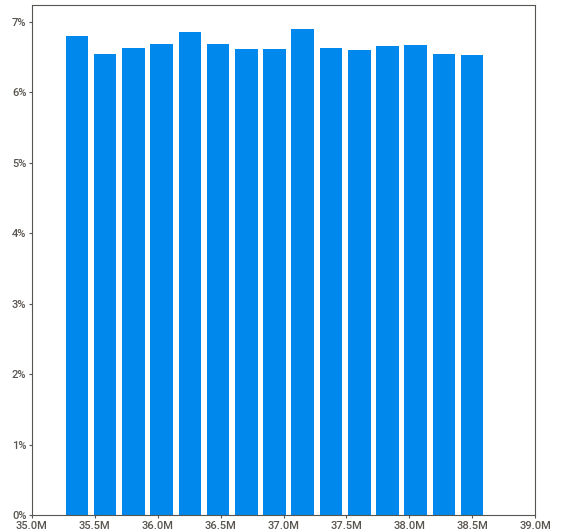
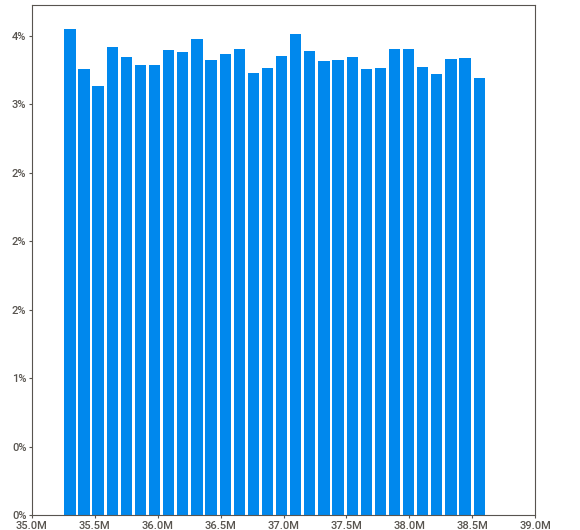
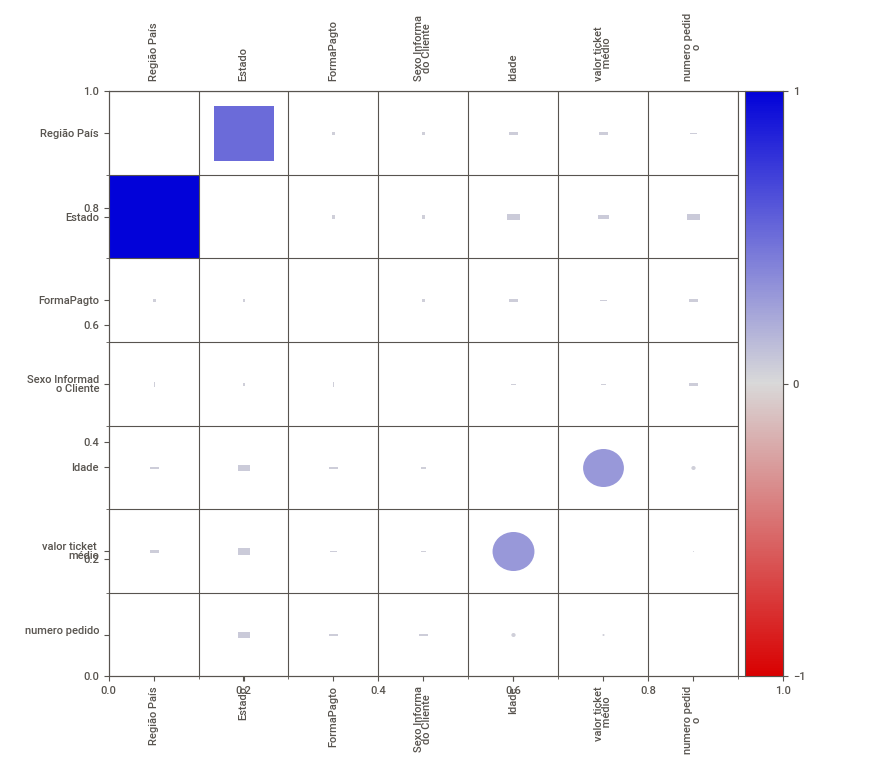
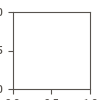

In [97]:
# criando relatório de análise
analise = sv.analyze(df)

#Imprimindo relaório
analise.show_notebook()

Além do cálculo manual e do método describe, também podemos utilizar bibliotecas especializadas para realizar uma análise estatística mais abrangente e visual. Um exemplo é o sweetviz, que permite gerar relatórios exploratórios detalhados com poucas linhas de código. Essa abordagem oferece uma maneira prática e eficiente de realizar uma análise inicial, especialmente útil para conjuntos de dados grandes ou com várias variáveis.

# Verificação e Tratamento de Outliers

In [98]:
df_tratado = df.copy()

Durante a análise, observamos valores discrepantes nas colunas 'Idade' e 'valor ticket médio'. Para validar esses outliers, adotamos uma abordagem baseada no desvio padrão, com critérios ajustados para cada variável, considerando as características distintas de suas distribuições. Enquanto a 'Idade' apresenta uma variação mais restrita, o 'valor ticket médio' possui uma maior dispersão, o que justificou a utilização de limites percentuais diferenciados. Além disso, utilizamos o boxplot para proporcionar uma visualização mais clara e intuitiva desses dados extremos.

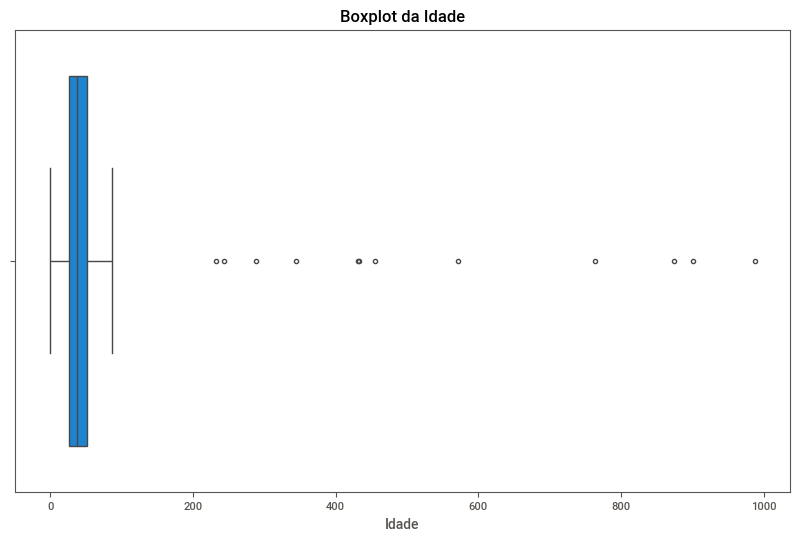

In [99]:
# Análise visual dos outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Idade'])
plt.title('Boxplot da Idade')
plt.xlabel('Idade')
plt.show()

In [100]:
# Calculando a média e o desvio padrão da coluna 'Idade'
media_idade = df_tratado['Idade'].mean()
desvio_idade = df_tratado['Idade'].std()

# Definindo o limite para identificar outliers (1.96 vezes o desvio padrão)
limite_outlier = 1.96 * desvio_idade

# Criaando a coluna 'Outlier' em df_tratado
df_tratado['Outlier'] = abs(df_tratado['Idade'] - media_idade) > limite_outlier

# Verificando a quantidade de outliers
print("Quantidade outlier", df_tratado['Outlier'].value_counts()[True])

# Calculando a mediana da coluna 'Idade'
mediana_idade = df_tratado['Idade'].median()
print("Mediana da Idade:", mediana_idade)

# Substituindo os valores de idade onde Outlier é True pela mediana
df_tratado.loc[df_tratado['Outlier'] == True, 'Idade'] = mediana_idade

# Verificando o resumo da coluna 'Idade' após a substituição
print("Resumo da coluna 'Idade' após substituição:")
print(df_tratado['Idade'].describe())


Quantidade outlier 20
Mediana da Idade: 38.0
Resumo da coluna 'Idade' após substituição:
count    47835.000000
mean        39.355179
std         13.965288
min         18.000000
25%         27.000000
50%         38.000000
75%         52.000000
max         70.000000
Name: Idade, dtype: float64


Utilizamos um critério de 1,96 vezes o desvio padrão para identificar os outliers na coluna "Idade", identificando 20 registros que ultrapassavam esse limite. Considerando o impacto que esses valores extremos teriam na média e variabilidade, optamos por substituí-los pela mediana, já que:
•	Média: seria influenciada negativamente pelos outliers.
•	Moda: não representaria bem o contexto dos dados.
Após a substituição, as estatísticas descritivas revelaram uma média de idade próxima de 39 anos e um valor máximo de 70, mais coerentes com a expectativa para essa variável.


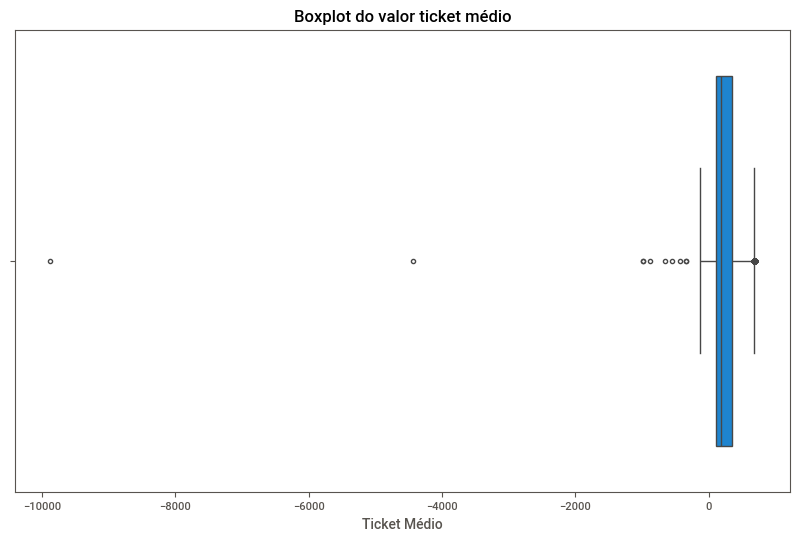

In [101]:
# Análise visual dos outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['valor ticket médio'])
plt.title('Boxplot do valor ticket médio')
plt.xlabel('Ticket Médio')
plt.show()

In [102]:
# Calcular a média e o desvio padrão da coluna "valor ticket médio"
media_ticket = df_tratado['valor ticket médio'].mean()
desvio_ticket = df_tratado['valor ticket médio'].std()

# Definir o limite para identificar outliers (3 vezes o desvio padrão)
limite_outlier = 3 * desvio_ticket

# Criar a coluna 'Outlier' em df_tratado
df_tratado['Outlier'] = abs(df_tratado['valor ticket médio'] - media_ticket) > limite_outlier

# Verificar a quantidade de outliers
print("Quantidade outliers:", df_tratado['Outlier'].value_counts()[True])

# Calcular a mediana da coluna 'valor ticket médio'
mediana_ticket = df_tratado['valor ticket médio'].median()
print("Mediana do Ticket Médio:", mediana_ticket)

# Substituir os valores de ticket médio onde Outlier é True pela mediana
df_tratado.loc[(df_tratado['valor ticket médio'] <= 0) | (df_tratado['Outlier'] == True), 'valor ticket médio'] = mediana_ticket

# Verificar o resumo da coluna 'valor ticket médio' após a substituição
print("Resumo da coluna 'valor ticket médio' após substituição:")
print(df_tratado['valor ticket médio'].describe())


Quantidade outliers: 10
Mediana do Ticket Médio: 183.0
Resumo da coluna 'valor ticket médio' após substituição:
count    47835.000000
mean       236.937326
std        157.801068
min         15.000000
25%        118.000000
50%        183.000000
75%        345.000000
max        690.000000
Name: valor ticket médio, dtype: float64


Análise e Substituição de Outliers na Coluna "Valor Ticket Médio"
Para a coluna "valor ticket médio", aplicamos um limite de 3 vezes o desvio padrão, identificando 10 outliers. Também detectamos valores negativos ou zerados, que não faziam sentido no contexto. Assim, substituímos esses valores pela mediana, garantindo uma análise mais confiável. As estatísticas após o ajuste mostraram:

* Média do ticket médio em aproximadamente 237.
*	Valor mínimo de 15, o que condiz com o cenário esperado.


# Análise e Recomendações para o Departamento Comercial

In [110]:
# Estatísticas descritivas do conjunto de dados após tratamento
df_tratado.describe()

,Data,Idade,valor ticket médio,numero pedido
count,47835,47835.000000,47835.000000,4.783500e+04
mean,2023-11-22 15:59:23.875823104,39.355179,236.937326,3.692327e+07
min,2023-09-01 00:00:00,18.000000,15.000000,3.524540e+07
25%,2023-10-22 00:00:00,27.000000,118.000000,3.608770e+07
50%,2023-11-17 00:00:00,38.000000,183.000000,3.692539e+07
75%,2023-12-16 00:00:00,52.000000,345.000000,3.776525e+07
max,2024-05-01 00:00:00,70.000000,690.000000,3.861223e+07
std,NaN,13.965288,157.801068,9.699485e+05


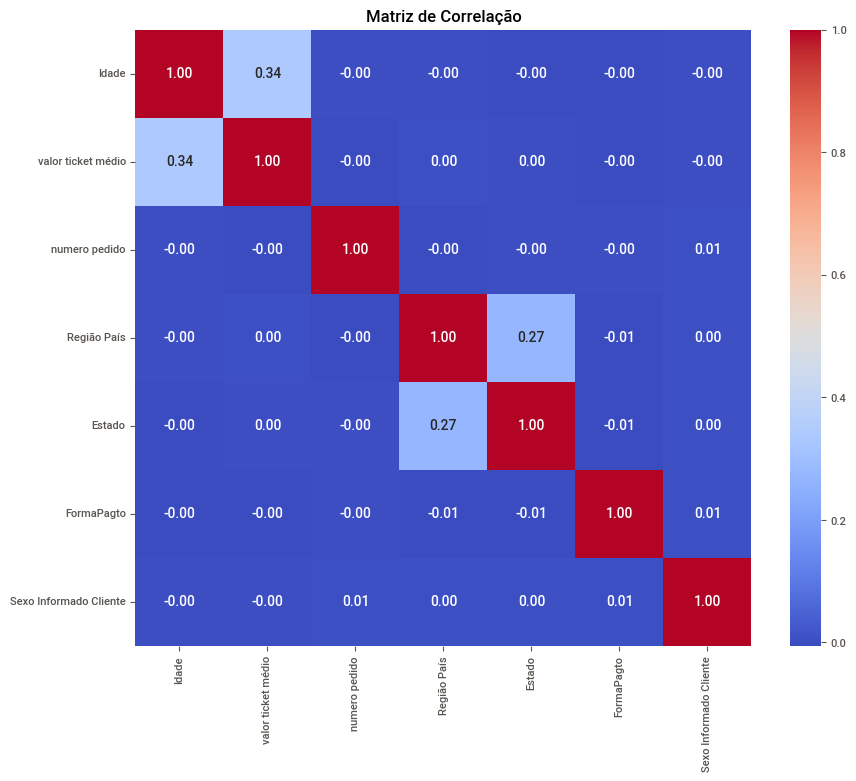

Correlações Mais Fortes:
 Idade   valor ticket médio    0.338889
Estado  Região País           0.270105
dtype: float64

Correlações Mais Fracas:
 FormaPagto   Estado       -0.005169
Região País  FormaPagto   -0.005517
dtype: float64


In [195]:
# Fazendo uma copa do df
df_corr = df_tratado.copy()

# Transformando variáveis categóricas em números com LabelEncoder
le = LabelEncoder()

df_corr['Região País'] = le.fit_transform(df_corr['Região País'])
df_corr['Estado'] = le.fit_transform(df_corr['Estado'])
df_corr['FormaPagto'] = le.fit_transform(df_corr['FormaPagto'])
df_corr['Sexo Informado Cliente'] = le.fit_transform(df_corr['Sexo Informado Cliente'])

# Selecionando apenas as variáveis numéricas para a correlação
df_numerico = df_corr[['Idade', 'valor ticket médio', 'numero pedido', 'Região País', 'Estado', 'FormaPagto', 'Sexo Informado Cliente']]

# Calculando a matriz de correlação usando o método Kendall
correlacao = df_numerico.corr(method='kendall')

# Estilizando a matriz de correlação para melhor visualização
correlacao_estilizada = correlacao.style.background_gradient(cmap='coolwarm')

# Exibindo a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação')
plt.show()

# Filtrando a matriz de correlação para remover correlações de 1 (diagonal)
correlacao_sem_diagonal = correlacao.mask(np.eye(correlacao.shape[0], dtype=bool))

# Encontrando as correlações mais fortes e mais fracas
correlacoes_ordenadas = correlacao_sem_diagonal.unstack().sort_values(kind="quicksort", ascending=False)

# Removendo duplicatas e valores nulos
correlacoes_ordenadas = correlacoes_ordenadas.drop_duplicates().dropna()

# Selecionando as correlações mais fortes e mais fracas
correlacoes_mais_fortes = correlacoes_ordenadas.head(2)
correlacoes_mais_fracas = correlacoes_ordenadas.tail(2)

# Exibindo as correlações mais fortes e mais fracas
print("Correlações Mais Fortes:\n", correlacoes_mais_fortes)
print("\nCorrelações Mais Fracas:\n", correlacoes_mais_fracas)


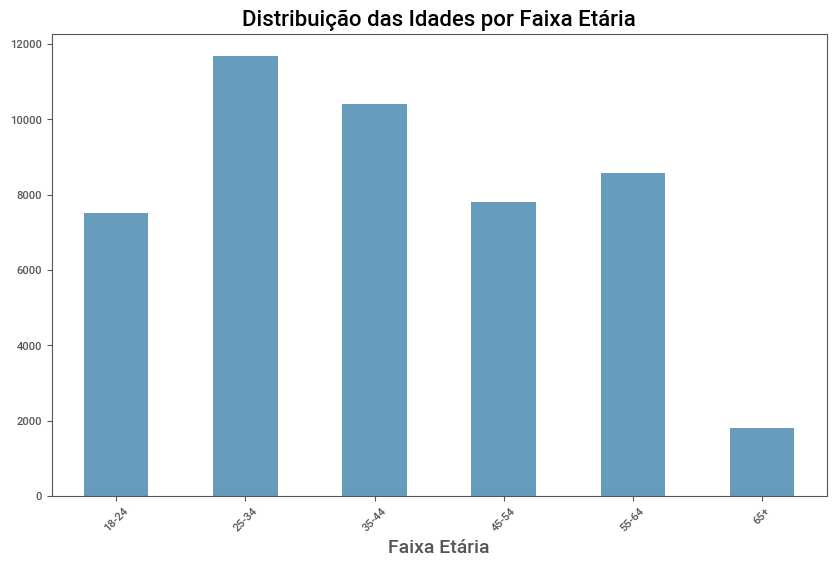

Contagem de Clientes por Faixa Etária:
Faixa Etária
25-34    11680
35-44    10421
55-64     8589
45-54     7805
18-24     7523
65+       1817
Name: count, dtype: int64


In [186]:
# Definindo as faixas etárias
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Atribuindo a faixa etária para cada cliente com base na sua idade
df_tratado['Faixa Etária'] = pd.cut(df_tratado['Idade'], bins=age_bins, labels=age_labels, right=False)

# Contagem de clientes por faixa etária
faixa_etaria_counts = df_tratado['Faixa Etária'].value_counts()

# Plotando a distribuição das idades por faixa etária
plt.figure(figsize=(10, 6))
faixa_etaria_counts.sort_index().plot(kind='bar', color='#669bbc')

# Personalizando o gráfico
plt.title('Distribuição das Idades por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.xticks(rotation=45)

plt.show()

# Exibindo a contagem de clientes por faixa etária
print("Contagem de Clientes por Faixa Etária:")
print(faixa_etaria_counts)


**Comentário sobre o resultado:**

O gráfico e a contagem revelam a distribuição dos clientes por faixa etária. Observamos que as faixas etárias mais concentradas são as de 25-34 anos e 35-44 anos, que somam a maior parte dos clientes, com 11.680 e 10.421 clientes, respectivamente. Isso pode indicar um público-alvo mais jovem, talvez com maior poder aquisitivo ou interesse pelos produtos/serviços oferecidos.

A faixa 55-64 anos vem em seguida, com 8.589 clientes, enquanto a faixa 45-54 anos tem 7.805 clientes. Isso sugere que uma boa parte do público está na faixa etária adulta, provavelmente no auge de sua carreira e com maior poder de compra.

Por outro lado, as faixas mais jovens (18-24 anos) e mais velhas (65+ anos) têm menos clientes, com 7.523 e 1.817 clientes, respectivamente. A faixa 65+ mostra um número significativamente menor, o que pode refletir um público com menor participação ou interesse nas ofertas da empresa.

Essa análise pode ajudar a direcionar campanhas de marketing ou a personalização de produtos/serviços para as faixas etárias com maior número de clientes, além de oferecer insights sobre o comportamento e preferências de diferentes grupos etários.








Valor Médio do Ticket Médio por Faixa Etária: Faixa Etária
18-24     67.0
25-34    163.0
35-44    335.0
45-54    465.0
55-64    158.0
65+      122.0
Name: valor ticket médio, dtype: float64


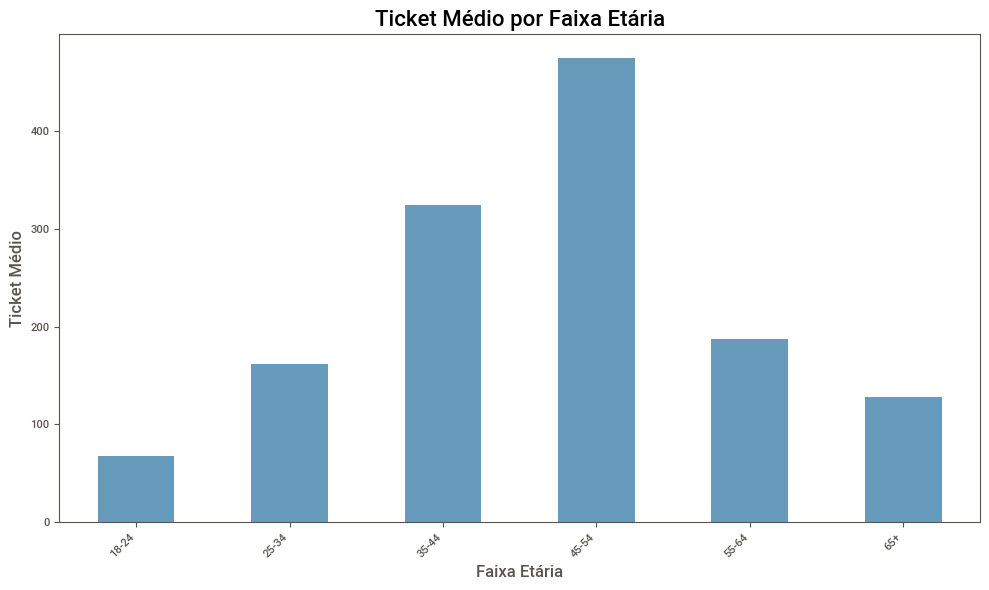

In [187]:
# Calculando o ticket médio por faixa etária
ticket_medio_por_faixa = df_tratado.groupby('Faixa Etária')['valor ticket médio'].mean()

# Exibindo os resultados
print("Valor Médio do Ticket Médio por Faixa Etária:", mediana_ticket_faixa_etaria)

# Criando o gráfico
plt.figure(figsize=(10,6))
ticket_medio_por_faixa.plot(kind='bar', color='#669bbc')

# Ajustando título e rótulos
plt.title('Ticket Médio por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Ticket Médio', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Mediana do Ticket Médio por Faixa Etária: Faixa Etária
18-24     67.0
25-34    163.0
35-44    335.0
45-54    465.0
55-64    158.0
65+      122.0
Name: valor ticket médio, dtype: float64


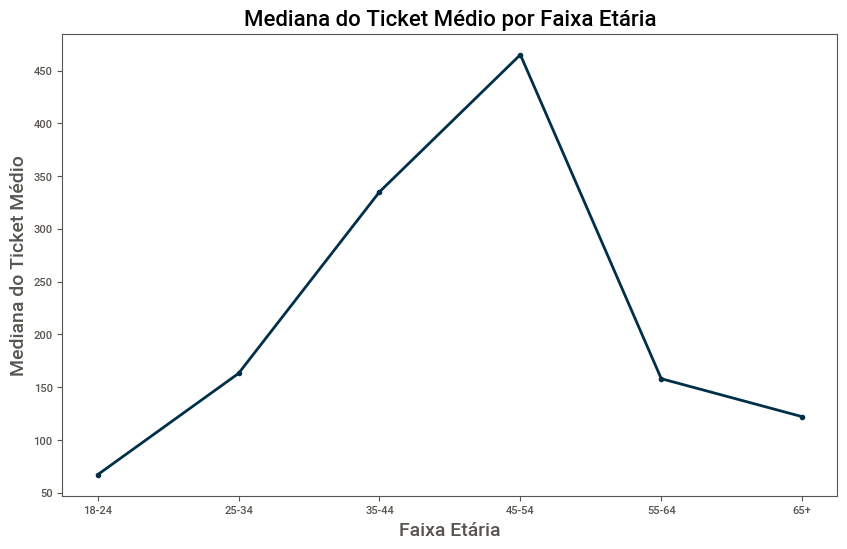

In [132]:
# Calculando a mediana do ticket médio por faixa etária
mediana_ticket_faixa_etaria = df_tratado.groupby('Faixa Etária')['valor ticket médio'].median()
print("Mediana do Ticket Médio por Faixa Etária:", mediana_ticket_faixa_etaria)

plt.figure(figsize=(10, 6))
mediana_ticket_faixa_etaria.plot(kind='line', marker='o', color='#003049', linewidth=2)

# Título e rótulos
plt.title('Mediana do Ticket Médio por Faixa Etária', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=14, fontweight='bold')
plt.ylabel('Mediana do Ticket Médio', fontsize=14, fontweight='bold')

# Remover o fundo e a grade
plt.grid(False)  # Remove a grade
plt.gca().set_facecolor('white')  # Define o fundo como branco (ou pode usar 'transparent' para fundo transparente)

# Mostrar o gráfico
plt.show()



**Comentário sobre o resultado:**

**A análise do Valor Médio do Ticket Médio por Faixa Etária revela que:**

**18-24 anos (R$ 67,00):** Ticket médio baixo, refletindo menor poder aquisitivo, comum em estudantes e jovens profissionais.

**25-34 anos (R$ 163,00):** Aumento no ticket, indicando maior poder de compra com clientes mais estabilizados financeiramente.

**35-44 anos (R$ 335,00):** Ticket médio mais alto, relacionado a maior estabilidade financeira e responsabilidades familiares.

**45-54 anos (R$ 465,00):** O maior ticket médio, indicando maior poder aquisitivo, com foco em produtos de maior valor e qualidade.

**55-64 anos (R$ 158,00):** Ticket médio abaixo das faixas anteriores, possivelmente devido a um comportamento de compra mais focado em itens essenciais.

**65+ anos (R$ 122,00):** O menor ticket médio, refletindo uma diminuição na renda após a aposentadoria e um foco em compras mais limitadas.

**Considerações gerais:**

Maior poder aquisitivo nas faixas de 35-54 anos: As faixas etárias de 35-44 e 45-54 anos apresentam os maiores valores médios de ticket, indicando que os clientes dessa faixa têm mais capacidade de gastar em compras de maior valor.
Redução no poder aquisitivo nas faixas mais jovens e mais velhas: Enquanto os clientes mais jovens (18-24) e mais velhos (65+) têm ticket médio mais baixo, o que pode refletir um padrão de consumo mais restrito.
Essa análise pode ser útil para direcionar campanhas de marketing, ajustando os produtos e preços de acordo com o comportamento esperado de cada faixa etária. Por exemplo, ofertas de maior valor podem ser mais eficazes nas faixas etárias mais velhas, enquanto estratégias de preço acessível podem ser mais atraentes para o público jovem.

Ranking de Vendas por Faixa Etária: Faixa Etária
45-54    3710434
35-44    3379239
25-34    1896012
55-64    1606481
18-24     508970
65+       232761
Name: valor ticket médio, dtype: int64


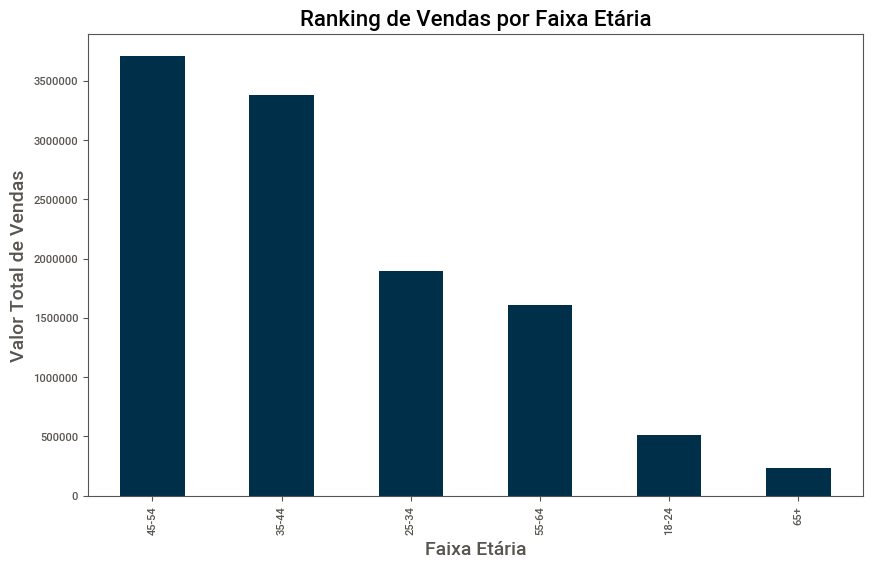

In [131]:
# Calculando o ranking das vendas por faixa etária
vendas_por_faixa_etaria = df_tratado.groupby('Faixa Etária')['valor ticket médio'].sum().sort_values(ascending=False)
print("Ranking de Vendas por Faixa Etária:", vendas_por_faixa_etaria)

# Criando o gráfico
plt.figure(figsize=(10, 6))
vendas_por_faixa_etaria.plot(kind='bar', color='#003049')

# Título e rótulos
plt.title('Ranking de Vendas por Faixa Etária', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=14, fontweight='bold')
plt.ylabel('Valor Total de Vendas', fontsize=14, fontweight='bold')

# Remover a grade
plt.grid(False)

# Mostrar o gráfico
plt.show()

**Comentário resumido sobre o resultado:**

* **Faixa Etária 45-54 (R$ 3.710.434):** Essa faixa lidera o ranking de vendas, indicando que clientes entre 45 e 54 anos são os principais contribuidores.

*	**Faixa Etária 35-44 (R$ 3.379.239):** Próxima ao topo, essa faixa etária também representa uma parcela significativa das vendas, sugerindo um alto poder aquisitivo.

*	**Faixa Etária 25-34 (R$ 1.896.012):** Com um volume de vendas menor que as duas faixas anteriores, essa faixa etária ainda representa uma parte substancial do total.

*	**Faixa Etária 55-64 (R$ 1.606.481):** Embora ainda significativa, o volume de vendas nesta faixa etária começa a diminuir, o que pode refletir um ajuste nos padrões de consumo, com maior foco em itens específicos ou um controle mais restrito.

*	**Faixa Etária 18-24 (R$ 508.970):** Esse grupo mais jovem gera um volume de vendas relativamente baixo, provavelmente devido ao menor poder aquisitivo.

*	**Faixa Etária 65+ (R$ 232.761):** Com o menor volume de vendas, essa faixa etária pode ter uma abordagem de consumo mais seletiva.

**Considerações Gerais:**

Esse ranking sugere que o foco para vendas de maior valor deve estar nas faixas de 35 a 54 anos, que respondem pela maior parte do volume. Já os clientes mais jovens e os mais velhos podem ser mais receptivos a campanhas de preços acessíveis ou a produtos de menor valor. Essa análise pode ser valiosa para alinhar estratégias de marketing e ofertas de acordo com o perfil de consumo de cada faixa etária.


In [188]:
# Idade Média por Faixa Etária
idade_media = df_tratado.groupby('Faixa Etária')['Idade'].mean()
# Variância por Faixa Etária
idade_variancia = df_tratado.groupby('Faixa Etária')['Idade'].var()
# Desvio Padrão por Faixa Etária
idade_desvio_padrao = df_tratado.groupby('Faixa Etária')['Idade'].std()

print("Idade Média por Faixa Etária:", idade_media)
print("Variância por Faixa Etária:", idade_variancia)
print("Desvio Padrão por Faixa Etária:", idade_desvio_padrao)

Idade Média por Faixa Etária: Faixa Etária
18-24    20.868935
25-34    28.284503
35-44    38.027061
45-54    48.559641
55-64    58.475725
65+      64.754540
Name: Idade, dtype: float64
Variância por Faixa Etária: Faixa Etária
18-24    2.994785
25-34    7.030019
35-44    8.386024
45-54    9.036070
55-64    8.144642
65+      1.212844
Name: Idade, dtype: float64
Desvio Padrão por Faixa Etária: Faixa Etária
18-24    1.730545
25-34    2.651418
35-44    2.895863
45-54    3.006006
55-64    2.853882
65+      1.101292
Name: Idade, dtype: float64


**Comentário sobre o Resultado:**

* **Idade Média:** As médias estão próximas do ponto central das faixas etárias, o que indica que a divisão das faixas captura bem a faixa real de idades dos clientes.

* **Variância e Desvio Padrão:** As faixas etárias mais amplas (25-34, 35-44, e 45-54) apresentam variâncias e desvios padrão relativamente maiores, indicando uma maior dispersão nas idades dos clientes dentro dessas faixas. Em contraste, a faixa 18-24 e 65+ têm variâncias e desvios padrão menores, sugerindo que as idades dos clientes nesses grupos estão mais próximas da média.

Esse resultado permite observar a distribuição de idades e identificar se as faixas etárias foram definidas com intervalos de variação consistentes. As faixas etárias maiores e centrais mostram uma maior variabilidade, refletindo talvez uma variedade de perfis de clientes em idades centrais, enquanto as faixas mais jovens e mais velhas são mais uniformes.

In [166]:
# Contagem de pedidos por estado
pedidos_por_estado = df_tratado.groupby('Estado')['numero pedido'].nunique()

# Calculando o total de pedidos
total_pedidos = pedidos_por_estado.sum()

# Calculando a representatividade percentual por estado
representatividade_estado = (pedidos_por_estado / total_pedidos) * 100

# Criando a tabela com quantidade de pedidos e representatividade
tabela_representatividade_estado = pd.DataFrame({
    'Quantidade de Pedidos': pedidos_por_estado,
    'Representatividade (%)': representatividade_estado.round(2)
})

# Ordenando a tabela por quantidade de pedidos em ordem decrescente
tabela_representatividade_estado = tabela_representatividade_estado.sort_values(by='Quantidade de Pedidos', ascending=False)

# Exibindo a tabela
print(tabela_representatividade_estado)


                     Quantidade de Pedidos  Representatividade (%)
Estado                                                            
Minas Gerais                          1930                    4.04
Paraná                                1929                    4.03
Rio de Janeiro                        1926                    4.03
Goiás                                 1919                    4.01
Amazonas                              1919                    4.01
Ceará                                 1918                    4.01
Mato Grosso                           1917                    4.01
Mato Grosso do  Sul                   1917                    4.01
Pernambuco                            1916                    4.01
Amapá                                 1914                    4.00
Espírito Santo                        1913                    4.00
Rio Grande do Sul                     1913                    4.00
Piauí                                 1912                    

**Análise do Resultado:**

**Distribuição Equilibrada:** A quantidade de pedidos é bastante uniforme entre os estados, com uma diferença mínima na representatividade percentual (todos em torno de 4%). Essa proximidade indica que nenhum estado domina expressivamente o volume de pedidos.

**Destaque Regional:** Minas Gerais, Paraná e Rio de Janeiro lideram com pouco mais de 4% de representatividade cada um. No entanto, mesmo os estados com menor representatividade, como Bahia e Santa Catarina, ainda apresentam percentuais próximos, mostrando uma distribuição relativamente balanceada.

**Implicações para Estratégia:** A distribuição homogênea dos pedidos pode ser favorável para estratégias de marketing que visem o alcance nacional, já que há uma presença considerável de pedidos em todo o país. Para empresas de logística, esse equilíbrio também sugere uma necessidade de infraestrutura e distribuição eficiente em múltiplas regiões, em vez de concentração em áreas específicas.

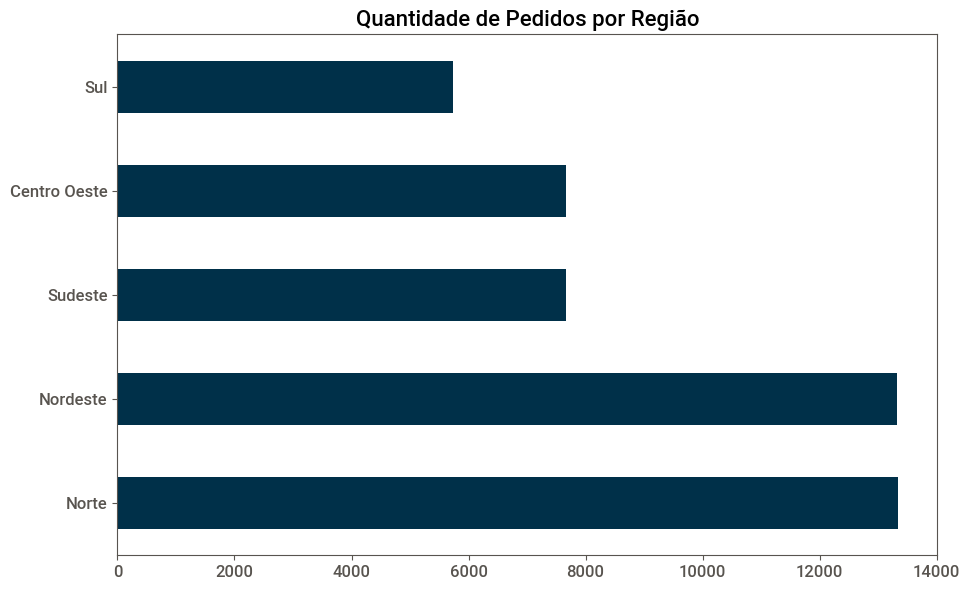

In [178]:
# Contagem de pedidos por região
pedidos_por_regiao = df_tratado.groupby('Região País')['numero pedido'].nunique().sort_values(ascending=False)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
pedidos_por_regiao.plot(kind='barh', color='#003049')

# Personalizando o gráfico
plt.title('Quantidade de Pedidos por Região', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)  # Remover grade
plt.tight_layout()

# Remover títulos dos eixos
plt.xlabel('')  # Remover título do eixo X
plt.ylabel('')  # Remover título do eixo Y

# Exibindo o gráfico
plt.show()


**Análise do Resultado:**

* **Liderança do Norte e Nordeste:** As regiões Norte e Nordeste têm os maiores números de pedidos, com 13.345 e 13.331 pedidos, respectivamente. Este alto volume pode indicar uma forte demanda de clientes nessas regiões, o que pode ser relevante para estratégias de atendimento ao cliente e para ações de marketing específicas para esses locais
.
* **	Demanda Moderada no Sudeste e Centro-Oeste:** A região Sudeste, que inclui grandes centros econômicos, apresenta um número de pedidos significativamente menor (7.670), seguido de perto pelo Centro-Oeste (7.658). Isso pode sugerir que, embora essas regiões sejam economicamente fortes, os volumes de pedido podem estar influenciados por fatores como concorrência local, preferências de mercado, ou até mesmo logística e cobertura de atendimento.

* **Baixa Representatividade do Sul:** Com apenas 5.738 pedidos, a região Sul possui a menor quantidade de pedidos entre todas as regiões. Esse dado pode indicar uma oportunidade de explorar novas estratégias para aumentar a presença da marca ou a penetração do mercado nessa área, que também possui um público-alvo significativo.


In [155]:
# Contagem de pedidos por forma de pagamento
pedidos_por_pagamento = df_tratado.groupby('FormaPagto')['numero pedido'].nunique()

# Calculando o total de pedidos
total_pedidos = pedidos_por_pagamento.sum()

# Calculando a representatividade percentual
representatividade = (pedidos_por_pagamento / total_pedidos) * 100

# Criando a tabela com quantidade e representatividade
tabela_representatividade = pd.DataFrame({
    'Quantidade de Pedidos': pedidos_por_pagamento,
    'Representatividade (%)': representatividade.round(2)
})

# Exibindo a tabela
tabela_representatividade

,Quantidade de Pedidos,Representatividade (%)
FormaPagto,,
Boleto Bancário,9624,20.16
Cartão Crédito,9766,20.45
Cartão Débito,9521,19.94
Dinheiro,9411,19.71
Pix,9422,19.73


**Análise do Resultado:**

**•	Cartão de Crédito como Preferência**:
Com 9.766 pedidos (20,45%), o cartão de crédito é a forma de pagamento mais popular entre os clientes, possivelmente devido à conveniência e à opção de parcelamento, tornando-o uma escolha atraente para compras de valores mais altos.

**•	Outras Formas de Pagamento Equilibradas:**
As demais opções, como boleto bancário (20,16%), cartão de débito (19,94%), dinheiro (19,71%) e Pix (19,73%), apresentam uma representatividade muito próxima entre si, todas em torno de 20%. Esse equilíbrio sugere que os clientes têm diferentes preferências de pagamento, com uma leve variação.

**•	Adoção Significativa do Pix e Dinheiro:** O Pix, com 9.422 pedidos (19,73%), mostra uma forte adoção, refletindo uma preferência por pagamentos instantâneos, enquanto o dinheiro (9.411 pedidos ou 19,71%) ainda mantém uma participação importante. Ambos indicam a diversidade de perfis de cliente, desde aqueles que preferem tecnologias novas até os que ainda utilizam métodos mais tradicionais.


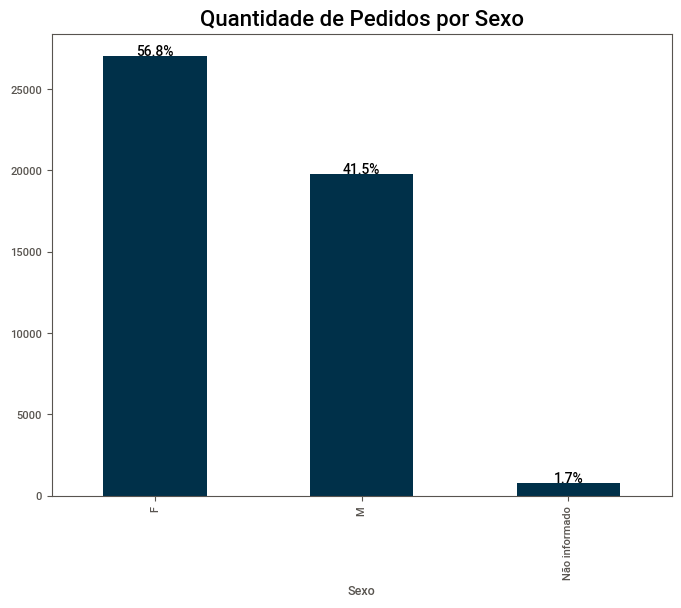

In [180]:
# Contagem de pedidos por Sexo
pedidos_por_sexo = df_tratado.groupby('Sexo Informado Cliente')['numero pedido'].nunique().sort_values(ascending=False)

# Calculando a porcentagem de representatividade
total_pedidos = pedidos_por_sexo.sum()
percentual_pedidos_sexo = (pedidos_por_sexo / total_pedidos) * 100

# Gráfico de barras para Sexo
plt.figure(figsize=(8, 6))
ax = pedidos_por_sexo.plot(kind='bar', color='#003049')

# Adicionando as porcentagens no gráfico
for i, v in enumerate(pedidos_por_sexo):
    ax.text(i, v + 0.5, f'{percentual_pedidos_sexo[i]:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Personalizando o gráfico
plt.title('Quantidade de Pedidos por Sexo', fontsize=16, fontweight='bold')
plt.xlabel('Sexo', fontsize=9, fontweight='bold')
plt.grid(False)
plt.show()


**Análise do Resultado:**

* **Maioria Feminina:** A maior parte dos pedidos é feita por clientes do sexo feminino, com 27.042 pedidos, representando uma parcela significativa. Esse número pode indicar uma maior participação feminina na base de clientes, sugerindo que o público-alvo majoritário da empresa inclui mulheres, o que pode ser relevante para direcionar campanhas de marketing, seleção de produtos e estratégias de comunicação.

* **Participação Masculina Considerável:** Os clientes do sexo masculino realizaram 19.793 pedidos. Embora seja uma quantidade menor em comparação com o público feminino, essa representação mostra que os homens também são uma parte importante da clientela. A estratégia da empresa pode, portanto, considerar as preferências específicas desse grupo para manter e expandir esse segmento.

* **Dados Não Informados:** Há 814 pedidos em que o gênero do cliente não foi informado. Embora seja uma parcela pequena, a ausência de dados completos pode limitar a análise de comportamento por gênero. Reduzir esse número pode melhorar a qualidade da análise e oferecer insights mais detalhados.


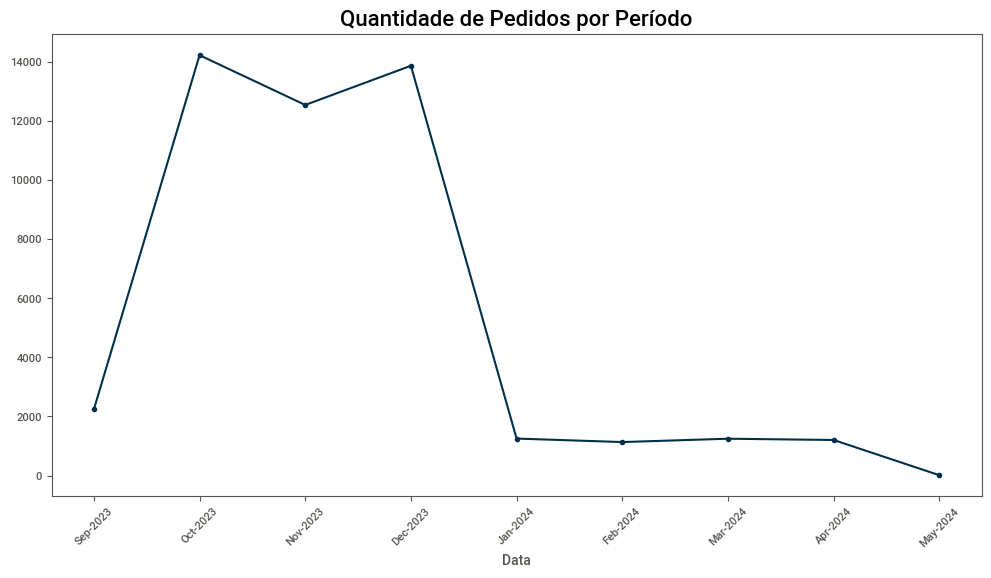

,numero pedido
Data,
Sep-2023,2240
Oct-2023,14238
Nov-2023,12553
Dec-2023,13880
Jan-2024,1251
Feb-2024,1133
Mar-2024,1246
Apr-2024,1203
May-2024,10


In [185]:
# Contagem de pedidos por período
df_tratado['Data'] = pd.to_datetime(df_tratado['Data'])
pedidos_por_periodo = df_tratado.groupby(df_tratado['Data'].dt.to_period('M'))['numero pedido'].nunique()

# Ordenar os dados para garantir que os meses apareçam de jan-2024 até dez-2024
pedidos_por_periodo = pedidos_por_periodo.sort_index(ascending=True)

# Formatar as datas no formato 'jan-2024', 'fev-2024', etc.
pedidos_por_periodo.index = pedidos_por_periodo.index.strftime('%b-%Y')

# Gráfico de linha para pedidos por período
plt.figure(figsize=(12, 6))
pedidos_por_periodo.plot(kind='line', marker='o', color='#003049')
plt.title('Quantidade de Pedidos por Período', fontsize=16, fontweight='bold')
plt.grid(False)  # Remover a grade
plt.xticks(rotation=45)  # Rotacionar as labels para melhor visualização
plt.show()


pedidos_por_periodo

**Análise do Resultado:**

**1. Picos de pedidos:**

Outubro de 2023 (14.238 pedidos) e Novembro de 2023 (12.553 pedidos) apresentam os maiores volumes de pedidos, o que pode indicar meses de alta demanda. Esses meses provavelmente coincidem com promoções sazonais ou eventos específicos (como Black Friday, por exemplo) que impulsionam o número de pedidos.
Dezembro de 2023 (13.880 pedidos) também apresenta um número significativo, o que é esperado devido a compras de final de ano, como o Natal.

**2. Queda nos pedidos a partir de Janeiro de 2024:**

Janeiro de 2024 (1.251 pedidos) e Fevereiro de 2024 (1.133 pedidos) mostram uma queda considerável no número de pedidos, o que pode estar relacionado a um período pós-festas, em que as vendas tendem a ser mais baixas. Este é um padrão comum no comércio após períodos de pico, como as festas de fim de ano.

**3. Estabilidade com leve queda:**

Março de 2024 (1.246 pedidos) e Abril de 2024 (1.203 pedidos) mostram uma leve estabilização, com um número de pedidos ainda relativamente baixo, mas sem grandes variações. Isso pode indicar uma fase de recuperação ou uma demanda constante, mas sem picos sazonais.

**4. Queda abrupta em Maio de 2024 (10 pedidos):**

A queda para 10 pedidos em Maio de 2024 é bastante expressiva e atípica. Essa diminuição acentuada pode indicar um erro de dados ou uma mudança significativa no comportamento dos consumidores, como um problema operacional, como a falta de estoque, campanhas de marketing não realizadas ou problemas logísticos.

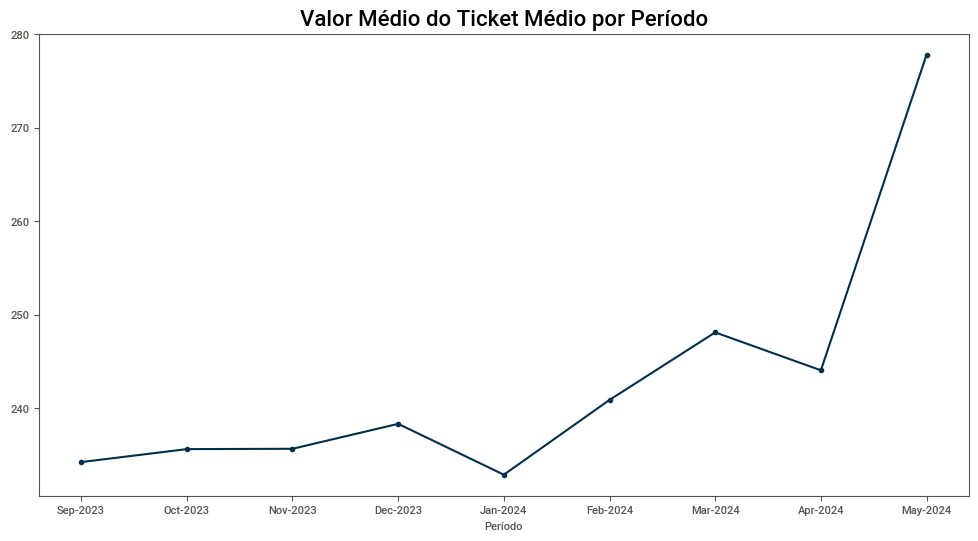

,valor ticket médio
Data,
Sep-2023,234.219545
Oct-2023,235.607258
Nov-2023,235.643039
Dec-2023,238.312095
Jan-2024,232.868106
Feb-2024,240.871139
Mar-2024,248.094703
Apr-2024,244.039037
May-2024,277.800000


In [169]:
# Calculando o ticket médio por período
ticket_medio_por_periodo = df_tratado.groupby(df_tratado['Data'].dt.to_period('M'))['valor ticket médio'].mean()

# Ordenar os dados para garantir que os meses apareçam de jan-2024 até dez-2024
ticket_medio_por_periodo = ticket_medio_por_periodo.sort_index(ascending=True)

# Formatar as datas no formato 'jan-2024', 'fev-2024', etc.
ticket_medio_por_periodo.index = ticket_medio_por_periodo.index.strftime('%b-%Y')

# Gráfico de linha para ticket médio por período
plt.figure(figsize=(12, 6))
ticket_medio_por_periodo.plot(kind='line', marker='o', color='#003049')
plt.title('Valor Médio do Ticket Médio por Período', fontsize=16, fontweight='bold')
plt.xlabel('Período', fontsize=8, fontweight='bold')
plt.grid(False)  # Remover a grade
plt.show()

ticket_medio_por_periodo

**Análise do Resultado:**

O valor do ticket médio permanece estável ao longo de 2023 e 2024, com variações entre 232 e 248. Há um aumento no ticket médio em dezembro, fevereiro e março, possivelmente devido a promoções sazonais. Maio de 2024 apresenta o maior ticket médio, com 277,80, o que pode indicar uma campanha ou mudança no mix de produtos. Esse aumento em maio merece mais atenção para avaliar se pode ser replicado em outros meses. Em geral, o valor médio por pedido não é muito influenciado pela sazonalidade, ao contrário da quantidade de pedidos.

<ipython-input-192-2b8cc0222213>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pedidos_por_periodo.index, rotation=45)


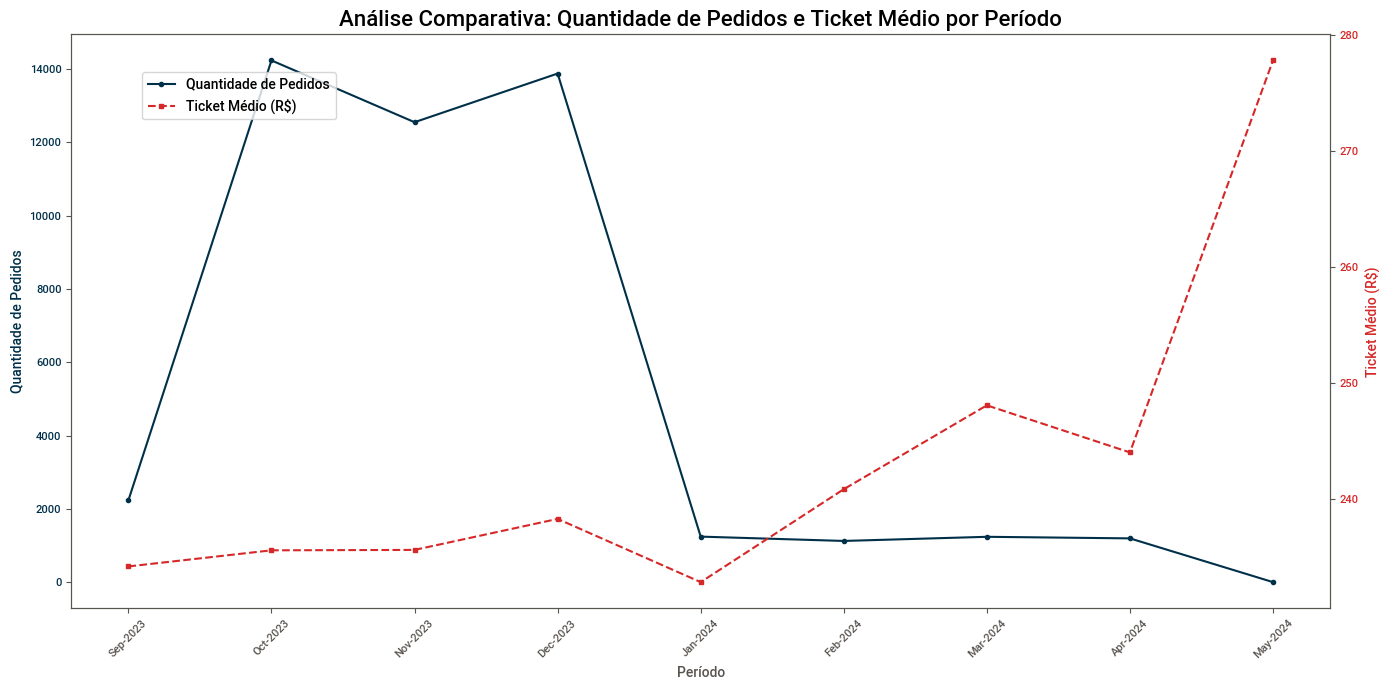

In [192]:
# Convertendo a coluna 'Data' para datetime, se ainda não estiver
df_tratado['Data'] = pd.to_datetime(df_tratado['Data'])

# Calculando a quantidade de pedidos por mês
pedidos_por_periodo = df_tratado.groupby(df_tratado['Data'].dt.to_period('M'))['numero pedido'].nunique()

# Calculando o ticket médio por mês
ticket_medio_por_periodo = df_tratado.groupby(df_tratado['Data'].dt.to_period('M'))['valor ticket médio'].mean()

# Ordenandi ambos os dados para garantir que os meses aparecem em sequência
pedidos_por_periodo = pedidos_por_periodo.sort_index(ascending=True)
ticket_medio_por_periodo = ticket_medio_por_periodo.sort_index(ascending=True)

# Formatando as datas no formato 'jan-2024', 'fev-2024', etc.
pedidos_por_periodo.index = pedidos_por_periodo.index.strftime('%b-%Y')
ticket_medio_por_periodo.index = ticket_medio_por_periodo.index.strftime('%b-%Y')

# Gráfico combinado para visualizar a quantidade de pedidos e o ticket médio por mês
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de quantidade de pedidos
color = '#003049'
ax1.set_xlabel('Período')
ax1.set_ylabel('Quantidade de Pedidos', color=color)
ax1.plot(pedidos_por_periodo.index, pedidos_por_periodo, color=color, marker='o', label='Quantidade de Pedidos')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(pedidos_por_periodo.index, rotation=45)

# Criando um segundo eixo y para o ticket médio
ax2 = ax1.twinx()
color = '#d62828'
ax2.set_ylabel('Ticket Médio (R$)', color=color)
ax2.plot(ticket_medio_por_periodo.index, ticket_medio_por_periodo, color=color, marker='s', linestyle='--', label='Ticket Médio (R$)')
ax2.tick_params(axis='y', labelcolor=color)

# Adicionando título e grid
plt.title('Análise Comparativa: Quantidade de Pedidos e Ticket Médio por Período', fontsize=16, fontweight='bold')
plt.grid(False)  # Remover a grade

# Adicionando uma legenda combinada para os dois eixos
fig.tight_layout()  # Para ajustar o layout e evitar sobreposição
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


**Análise do Resultado:**

**1. Setembro a Dezembro de 2023:**

* **Pedidos:** A quantidade de pedidos aumentou significativamente, com picos em
outubro e dezembro, sugerindo alta demanda, possivelmente devido a promoções e datas sazonais.

* **Ticket Médio:** Permaneceu estável, variando entre R$ 234,22 e R$ 238,31, indicando foco em volume de vendas sem grandes alterações no valor por transação.

**2. Janeiro a Março de 2024:**

* **Pedidos:** A quantidade de pedidos caiu drasticamente, especialmente em janeiro e fevereiro, sugerindo uma desaceleração nas vendas pós-festas.
Ticket Médio: Subiu, atingindo R$ 248,09 em março, o que pode refletir uma estratégia focada em transações de maior valor, com menos volume de pedidos.

**3. Abril a Maio de 2024:**

* **Pedidos:** O número de pedidos continuou a cair, especialmente em maio (apenas 10 pedidos).

* **Ticket Médio:** Aumentou para R$ 277,80, indicando uma estratégia de focar em produtos de maior valor, com menor volume de vendas.

**Conclusão:**

Setembro a Dezembro: A empresa priorizou o volume de vendas, mantendo o ticket médio estável.  

Janeiro a Maio: Houve uma mudança para um modelo focado em maior rentabilidade por pedido, com menos transações, mas de maior valor.

A queda nos pedidos e o aumento do ticket médio sugerem uma adaptação para melhorar a rentabilidade após o pico de vendas de final de ano.

# **Considerações finais:**

O público da empresa é predominantemente concentrado nas faixas etárias de 25-34 anos e 35-44 anos, que juntas representam uma parte significativa dos clientes. Esse perfil sugere que a empresa atrai principalmente jovens adultos e pessoas em fase de maior estabilidade financeira. Essas informações podem ser valiosas para direcionar estratégias de marketing e personalização de ofertas, focando nesses grupos como principais alvos.

A análise do ticket médio por faixa etária revela um aumento considerável à medida que a idade avança. As faixas de 35-44 anos e 45-54 anos apresentam os maiores valores de ticket médio, indicando que esses grupos possuem maior poder aquisitivo e, portanto, são um público-chave para campanhas de produtos de maior valor. Por outro lado, as faixas etárias de 18-24 anos e 65+ anos mostram valores mais baixos de ticket médio, o que pode refletir padrões de consumo mais restritos. Isso destaca a necessidade de ajustes em campanhas para atrair esses públicos de forma mais eficaz.

Além disso, a análise indicou que, apesar do bom desempenho em termos de rentabilidade por pedido, houve uma queda no número de pedidos, especialmente após o período de festas. Esse comportamento sugere a necessidade de equilibrar o volume de pedidos com o valor médio de cada um. Para mitigar esse impacto, o departamento comercial pode considerar estratégias de promoções sazonais, programas de fidelização de clientes e uma análise mais aprofundada do comportamento de compra, a fim de otimizar os resultados ao longo do ano.
